**Dataset Description:**

This dataset is designed for multiple disease classification, containing 132 features, each representing a distinct symptom. The features capture a wide variety of medical conditions, ranging from common symptoms like itching and skin rash to more complex issues such as dizziness, abdominal pain, and muscle weakness. The dataset provides binary values (1 for presence and 0 for absence) for each symptom, which are used to predict the disease diagnosis.

**Target Variable:**

Prognosis: The target variable, "prognosis," represents the predicted medical condition or disease based on the observed symptoms. Each row in the dataset corresponds to a patient's set of symptoms, with the prognosis indicating the specific disease or infection, such as Fungal Infection, identified based on the symptom patterns.

**Importing modules**

In [118]:
import pandas as pd
import numpy as np
from google.colab import files
import io
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import VotingClassifier

Loading training dataset

In [35]:
uploaded = files.upload()
filename = next(iter(uploaded))
df_train = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving Training.csv to Training (2).csv


<ipython-input-35-a6283b31fa6b>:3: DtypeWarning: Columns (2,3,4,5,6,7,16,17,19,29,30,32,33,35,36,39,46,47,52,53,59,61,70,85,87,88,92,104,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(io.BytesIO(uploaded[filename]))


In [36]:
df_train.head()

prognosis  itching skin_rash nodal_skin_eruptions  \
0  Fungal infection      1.0       1.0                  1.0   
1  Fungal infection      0.0       1.0                  1.0   
2  Fungal infection      1.0       NaN                  1.0   
3  Fungal infection      1.0       1.0                  0.0   
4  Fungal infection      1.0       1.0                  1.0   

  continuous_sneezing shivering chills joint_pain  stomach_pain  acidity  ...  \
0                   0         0      0          0           0.0      0.0  ...   
1                   0         0      0          0           0.0      0.0  ...   
2                   0         0      0          0           0.0      0.0  ...   
3                   0         0      0          0           0.0      NaN  ...   
4                   0       NaN      o          0           0.0      0.0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                 0.0         0.0       0.0           0.0   
1                 0.0         0.0       0.0           0.0   
2                 0.0         0.0       0.0           0.0   
3                 0.0         0.0       0.0           0.0   
4                 0.0         0.0       0.0           0.0   

   silver_like_dusting  small_dents_in_nails inflammatory_nails blister  \
0                  0.0                   0.0                0.0     0.0   
1                  0.0                   0.0                0.0     0.0   
2                  0.0                   0.0                0.0     0.0   
3                  0.0                   0.0                0.0     NaN   
4                  0.0                   0.0                0.0     0.0   

   red_sore_around_nose yellow_crust_ooze  
0                   0.0               0.0  
1                   0.0               0.0  
2                   0.0               0.0  
3                   0.0               0.0  
4                   0.0               0.0  

[5 rows x 133 columns]

In [37]:
df_train.shape

(4920, 133)

Number of unique diseases in the dataset

In [39]:
df_train['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy                                    120
hepatitis A                                120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
Impetigo                                   120
Name: count, dtype: int64

Data Cleaning

In [40]:
for col in df_train.columns:
   print(col, df_train[col].unique())

prognosis ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
itching [ 1.  0. nan]
skin_rash [1.0 nan 0.0 '1' '0' 'o']
nodal_skin_eruptions [1.0 0.0 nan '0' '1' 'o']
continuous_sneezing ['0' nan '1' 'o' 0.0 1.0]
shivering ['0' nan '1' 'o' 0.0 1.0]
chills ['0' 'o' '1' nan 0.0 1.0]
joint_pain ['0' nan 'o' '1' 0.0 1.0]
stomach_pain [ 0. nan  1.]
acidity [ 0. nan  1.]
ulcers_on_tong

Some columns have 'o' instead of 0 or 1 so we remive those values

In [41]:
df_train.replace({'o', ''}, inplace = True)

<ipython-input-41-1bf57b191066>:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_train.replace({'o', ''}, inplace = True)


checking null values

In [42]:
null = df_train.isnull().sum()
null

prognosis                0
itching                 36
skin_rash               27
nodal_skin_eruptions    34
continuous_sneezing     29
                        ..
small_dents_in_nails     5
inflammatory_nails       6
blister                  9
red_sore_around_nose     6
yellow_crust_ooze        6
Length: 133, dtype: int64

converting columns to numeric and filling with mode of the disease group

In [43]:
df_train.replace({'': np.nan}, inplace=True)

col = df_train.columns.drop('prognosis')
for c in col:
    df_train[c] = pd.to_numeric(df_train[c], errors='coerce')

df_train[col] = df_train[col].astype(pd.Int64Dtype())

grouped = df_train.groupby('prognosis')

def fill_with_mode(group):
    for c in col:
        mode_value = group[c].mode()[0]
        group[c] = group[c].fillna(mode_value)
    return group

df_train_filled = grouped.apply(fill_with_mode)

null_count = df_train_filled.isnull().sum()
print(null_count)

prognosis               0
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 133, dtype: int64


<ipython-input-43-3ec6f23d6e20>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_filled = grouped.apply(fill_with_mode)


checking if columns are converted properly

In [44]:
df_train_filled.dtypes

prognosis               object
itching                  Int64
skin_rash                Int64
nodal_skin_eruptions     Int64
continuous_sneezing      Int64
                         ...  
small_dents_in_nails     Int64
inflammatory_nails       Int64
blister                  Int64
red_sore_around_nose     Int64
yellow_crust_ooze        Int64
Length: 133, dtype: object

Data Analysis

In [122]:
# # Apply label encoding if 'prognosis' is categorical
# le = LabelEncoder()
# df_train_filled['prognosis'] = le.fit_transform(df_train['prognosis'])

# # Separate features and target
# X = df_train_filled.drop(columns=['prognosis'])
# y = df_train_filled['prognosis']

# # Chi-Square test
# chi2_vals, p_vals = chi2(X, y)

# # Create a DataFrame for the results
# chi_square_results = pd.DataFrame({
#     'Feature': X.columns,
#     'Chi2 Stat': chi2_vals,
#     'P-value': p_vals
# })

# # Sort by P-value (smaller is more significant)
# chi_square_results = chi_square_results.sort_values('P-value')
# print(chi_square_results)

checking which column has 98% null values and dropping them

In [45]:
threshold = 0.98  # 98% threshold
to_drop = [col for col in df_train_filled.columns if df_train_filled[col].value_counts(normalize=True).max() > threshold]
print(to_drop)
df_train_filled.drop(columns=to_drop, inplace=True)

['fluid_overload']


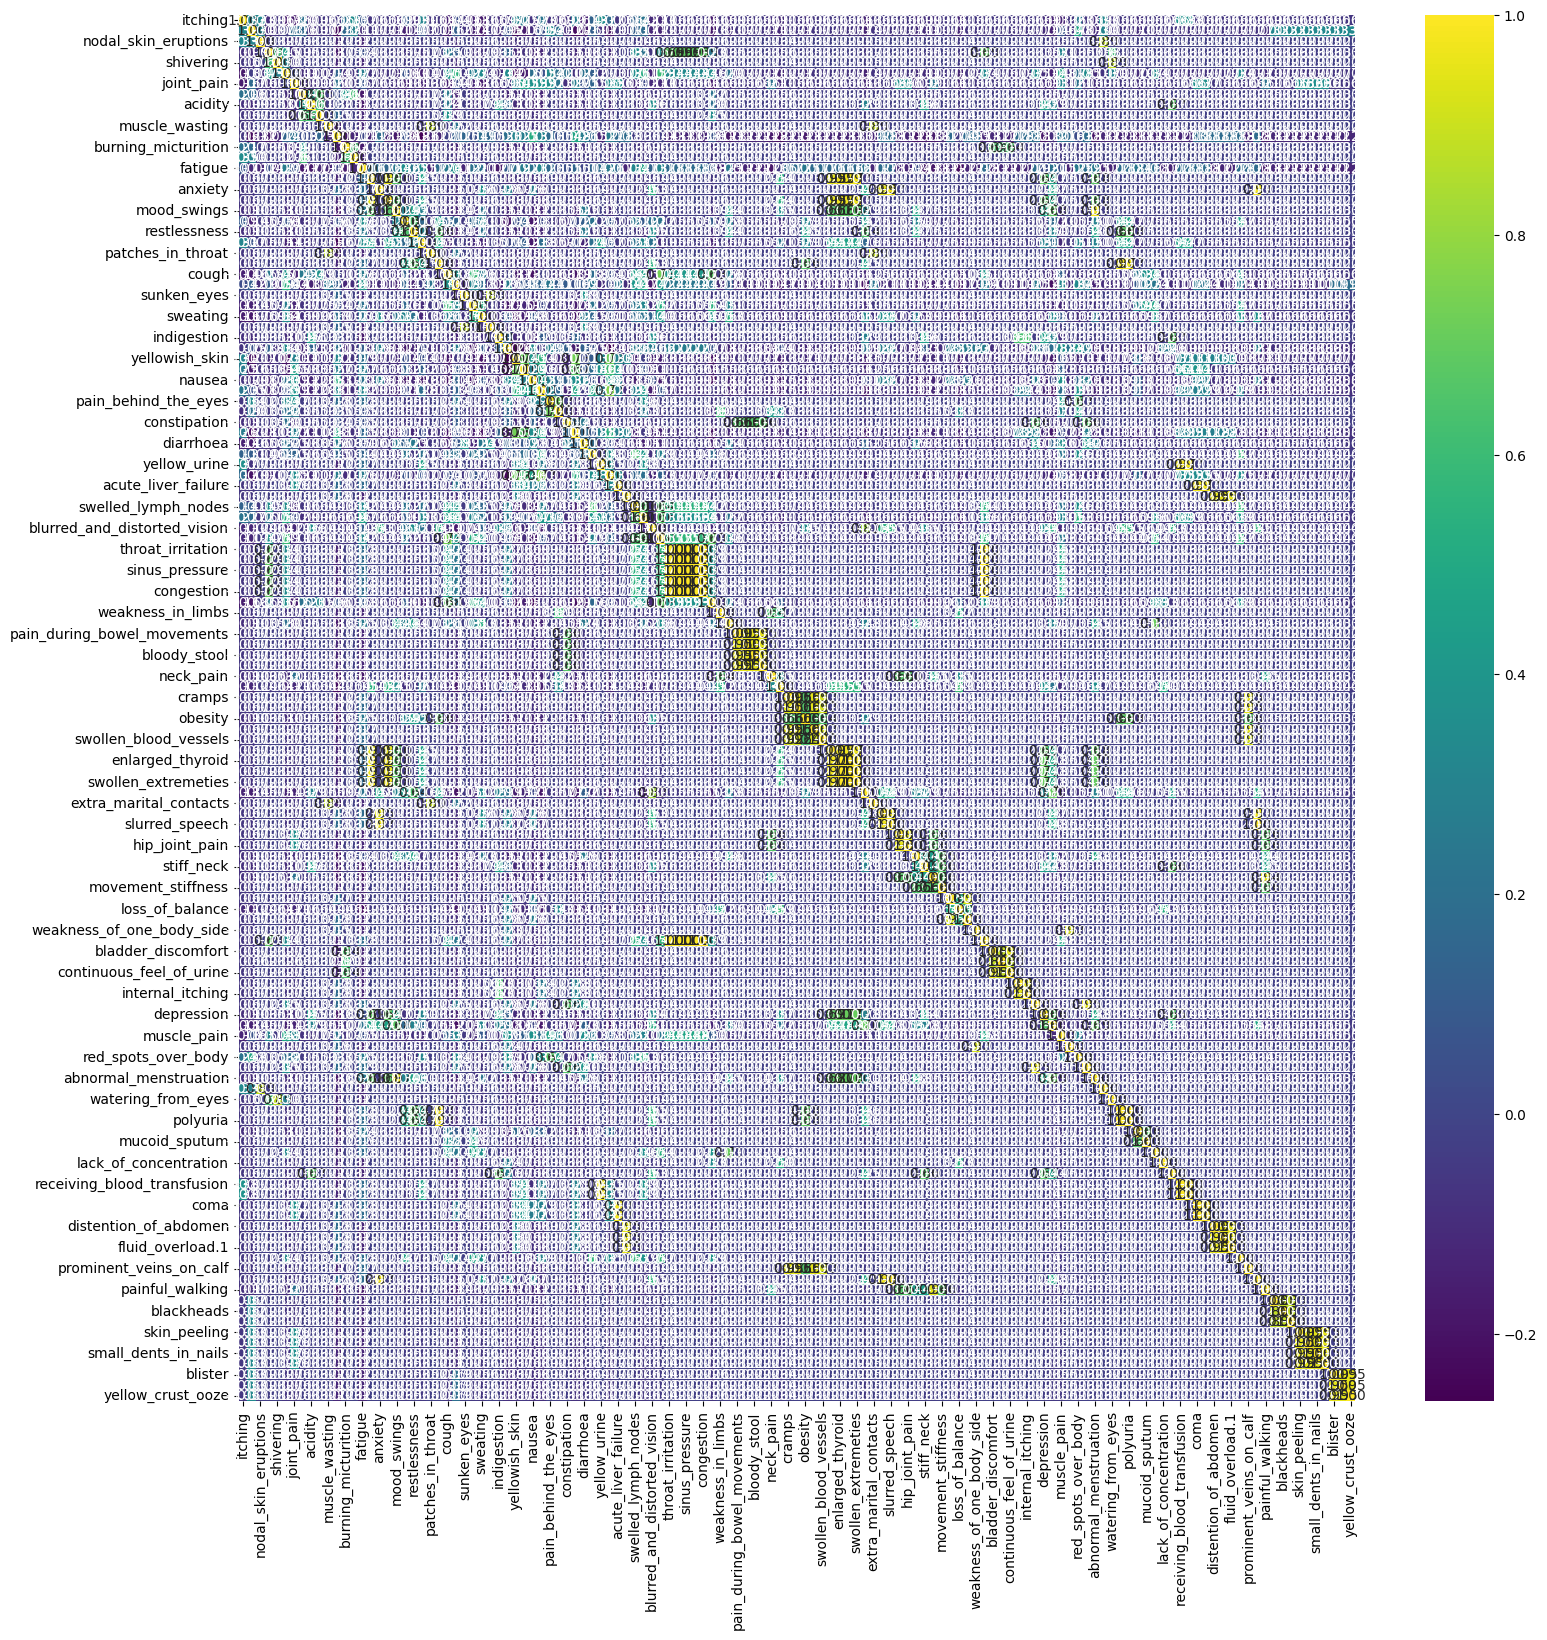

In [46]:
X = df_train_filled.drop(columns=['prognosis'])
fig = plt.figure(figsize=(18, 18))
sns.heatmap(X.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

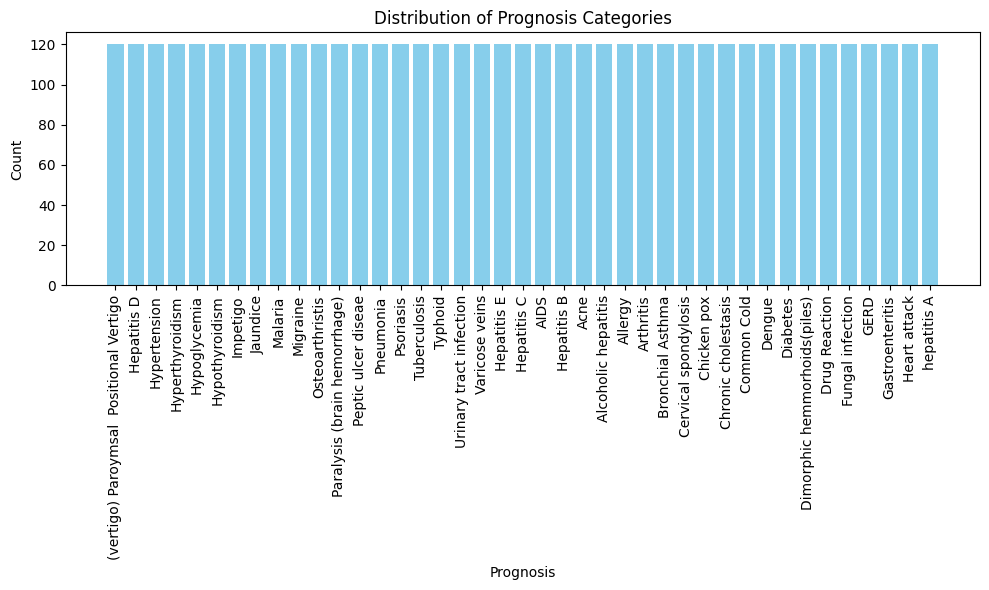

In [109]:
prognosis_counts = df_train_filled['prognosis'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(prognosis_counts.index, prognosis_counts.values, color='skyblue')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.title('Distribution of Prognosis Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

since all disease have equal instances, we have balanced data

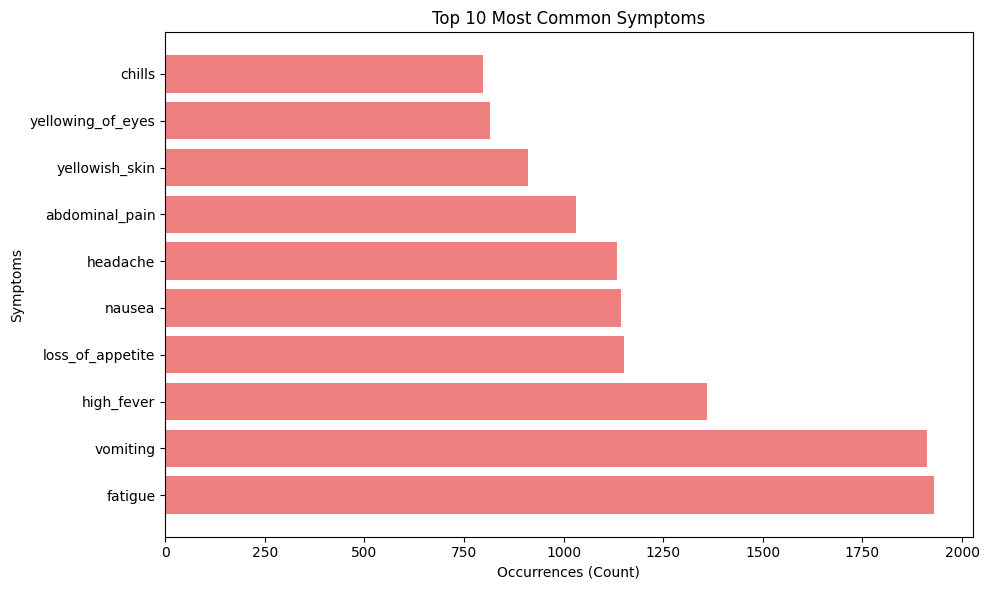

In [111]:
symptom_totals = df_train[symptom_columns].sum().sort_values(ascending=False)
top_symptoms = symptom_totals.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_symptoms.index, top_symptoms.values, color='lightcoral')
plt.xlabel('Occurrences (Count)')
plt.ylabel('Symptoms')
plt.title('Top 10 Most Common Symptoms')
plt.tight_layout()
plt.show()

<ipython-input-112-b53a2f601d39>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


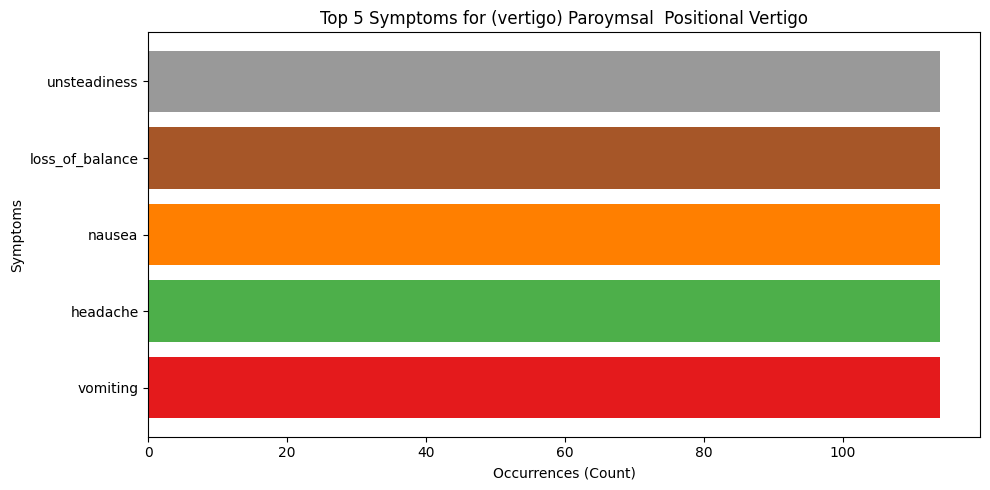

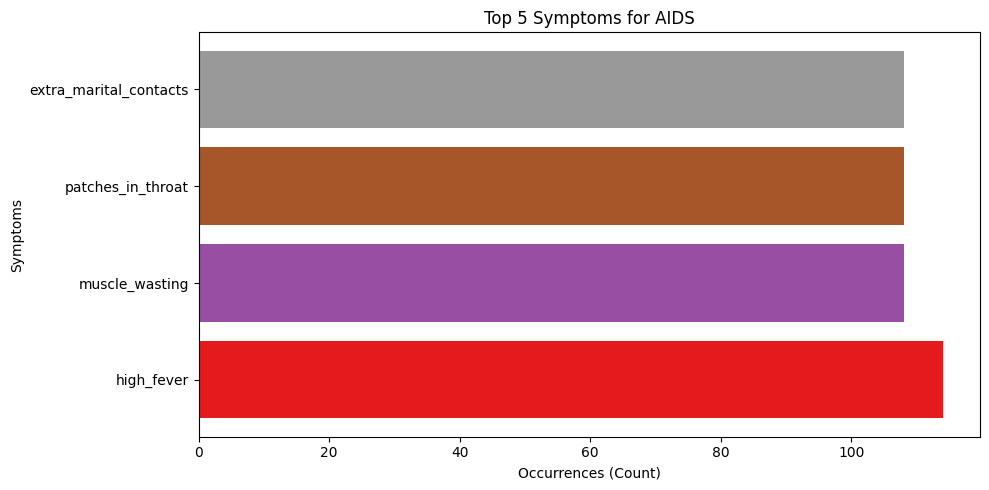

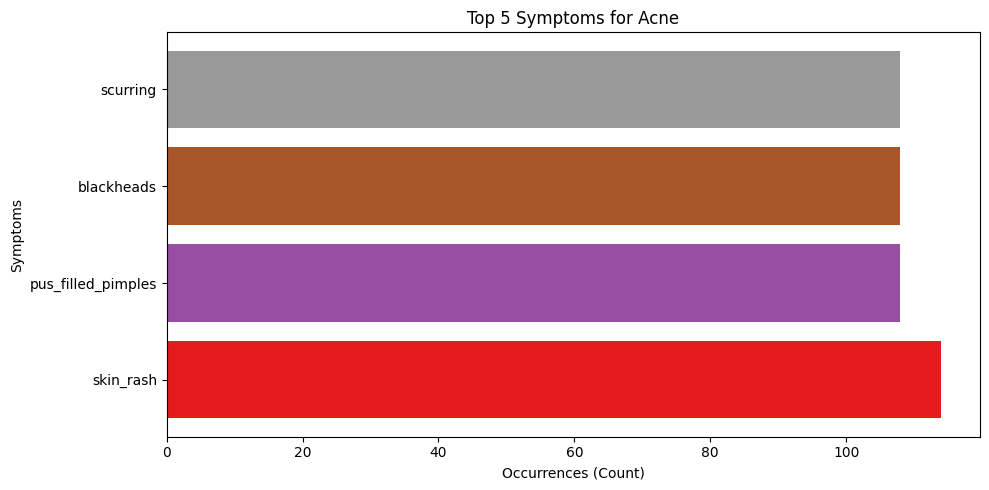

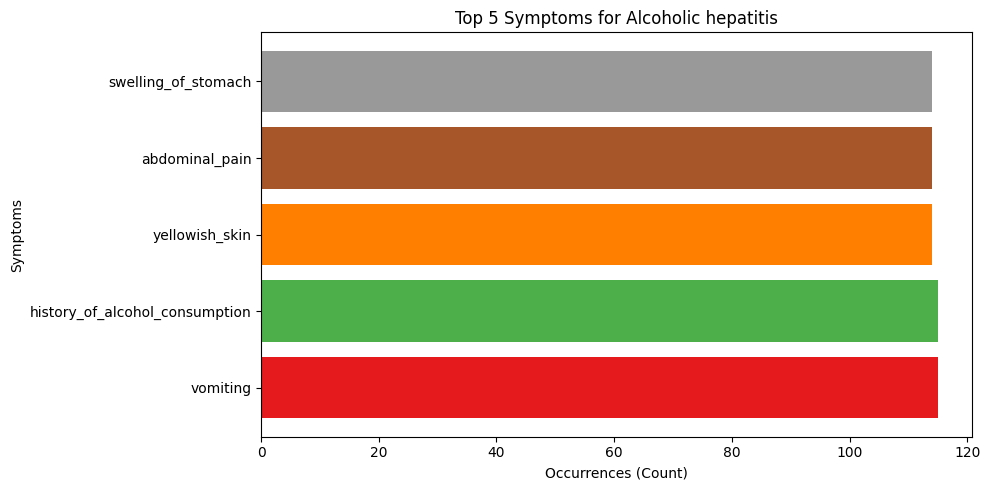

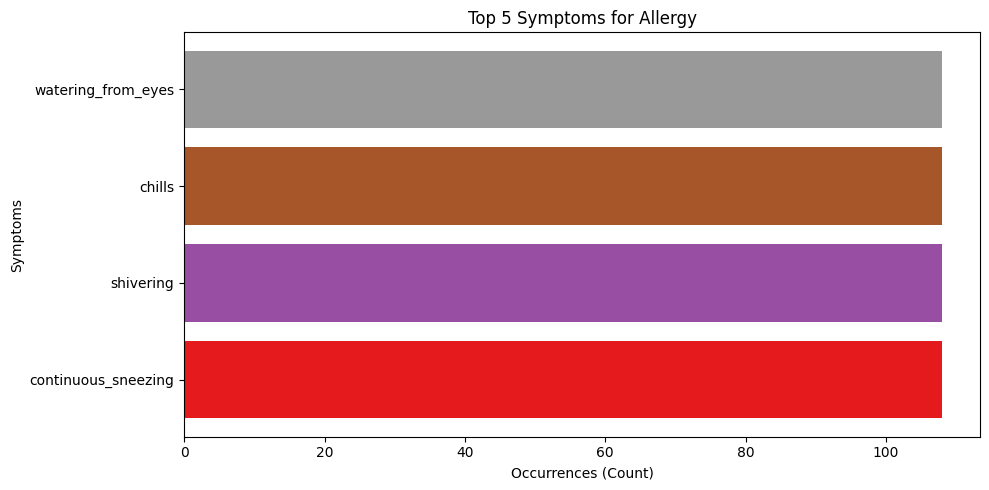

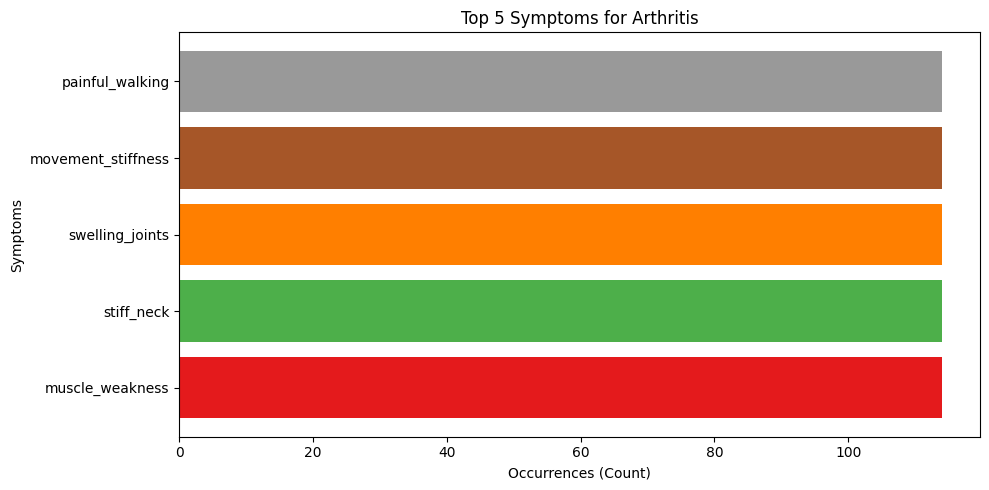

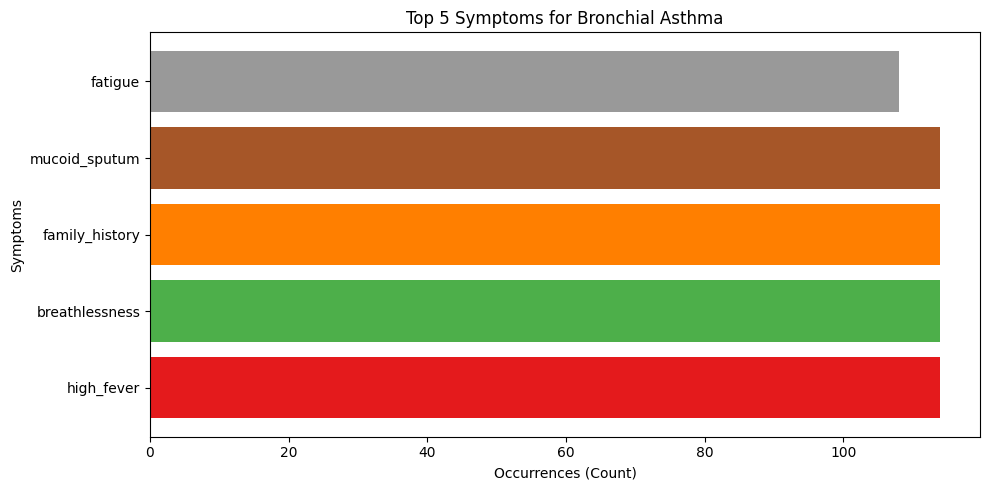

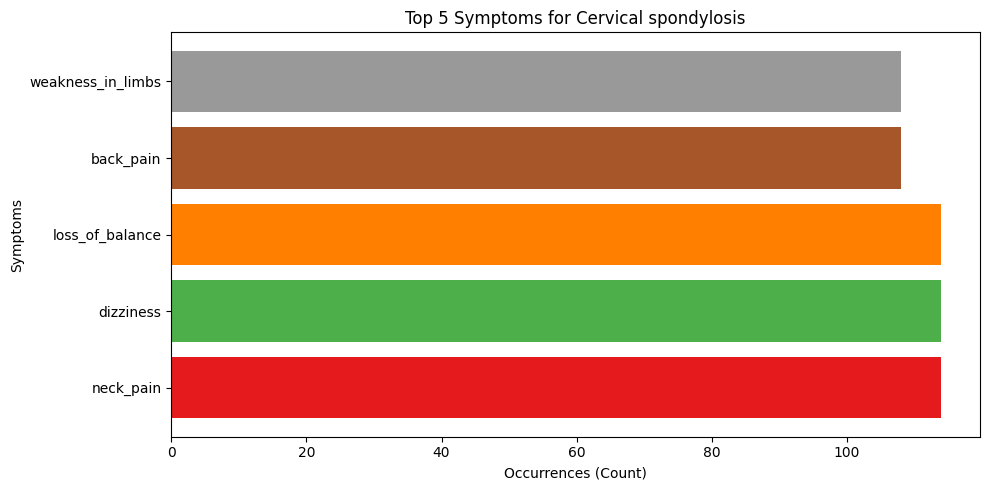

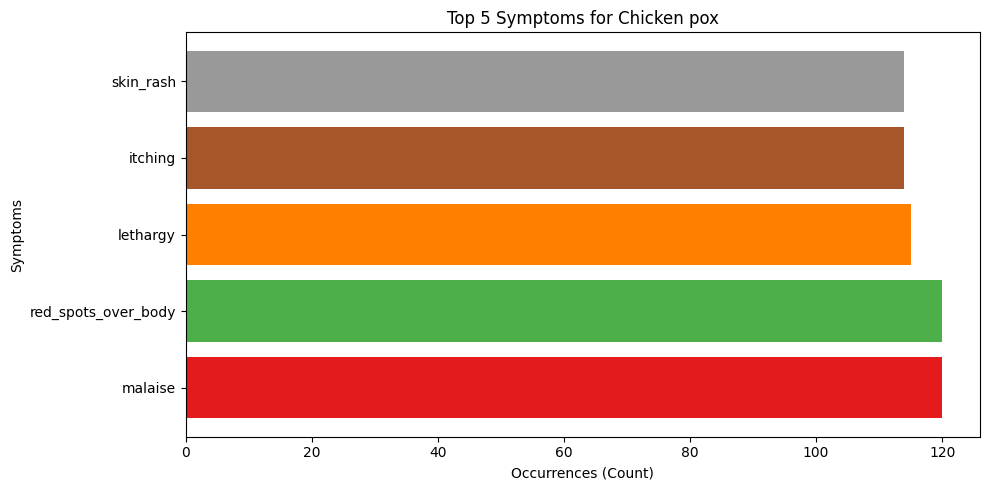

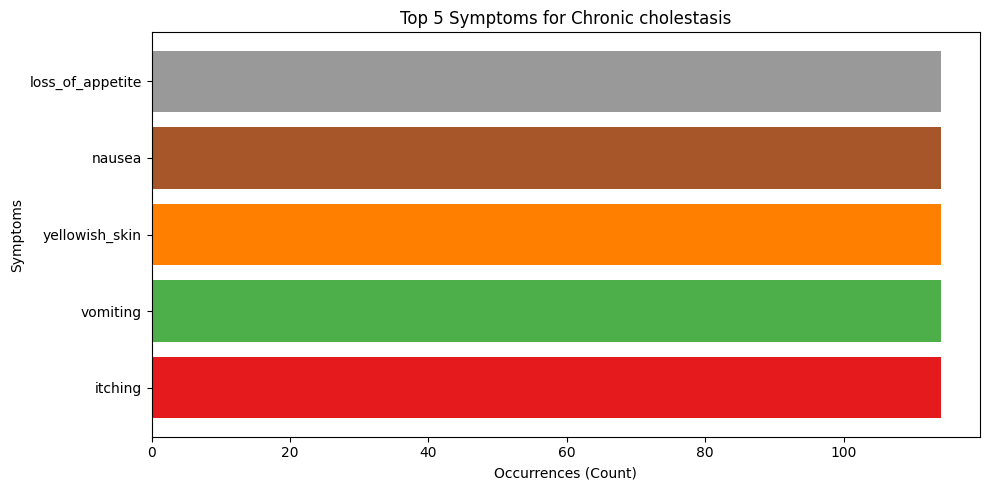

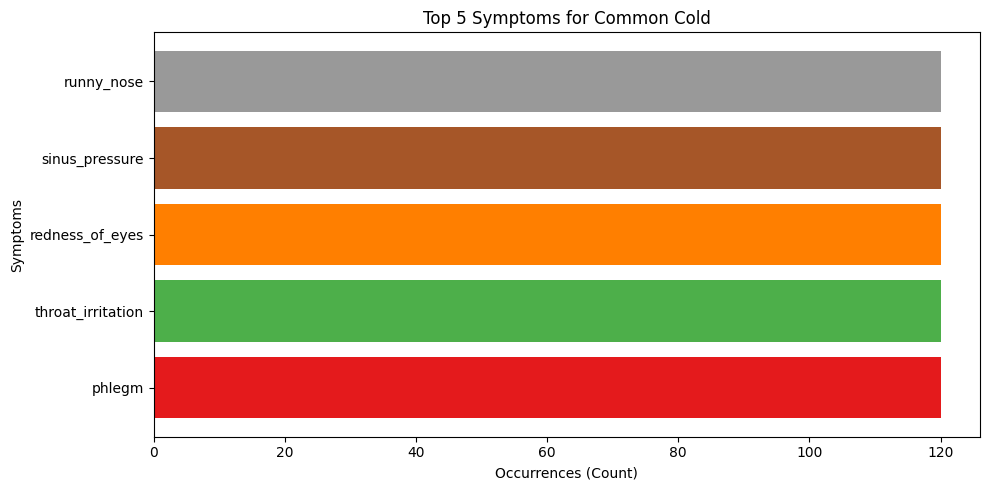

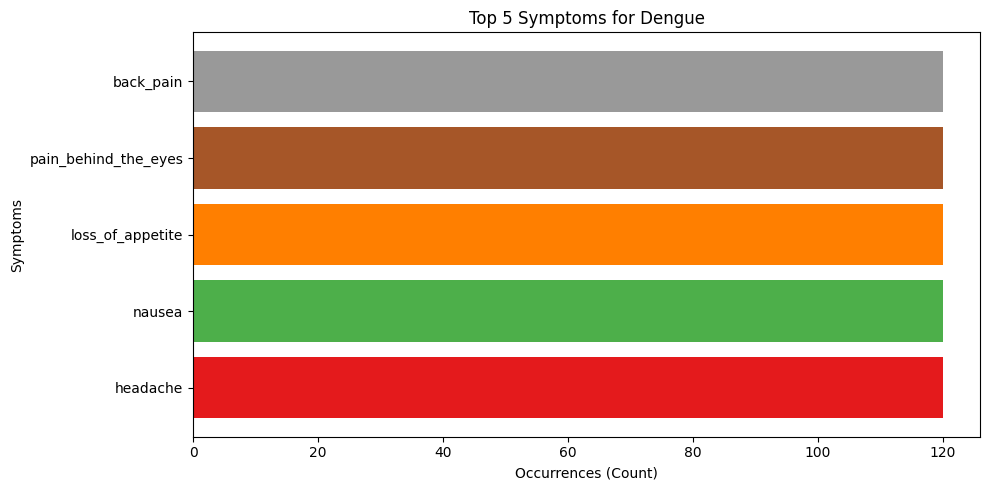

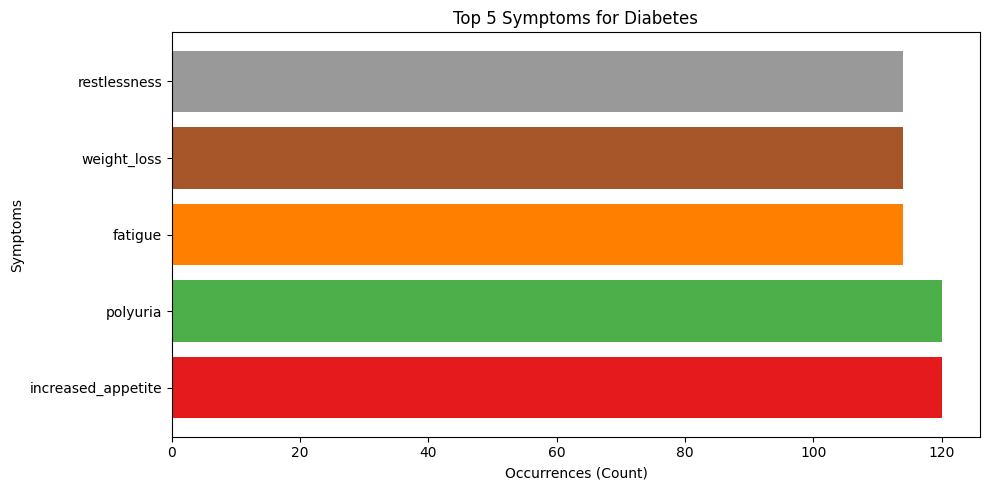

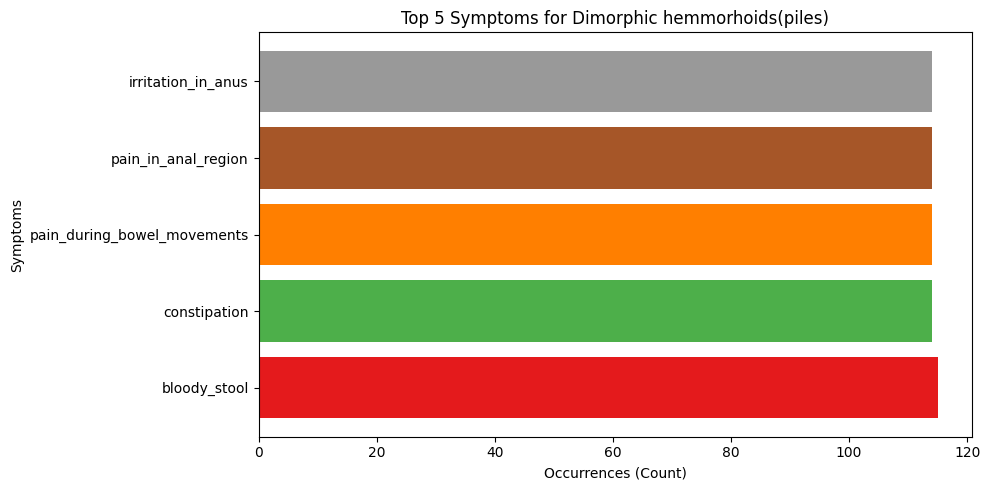

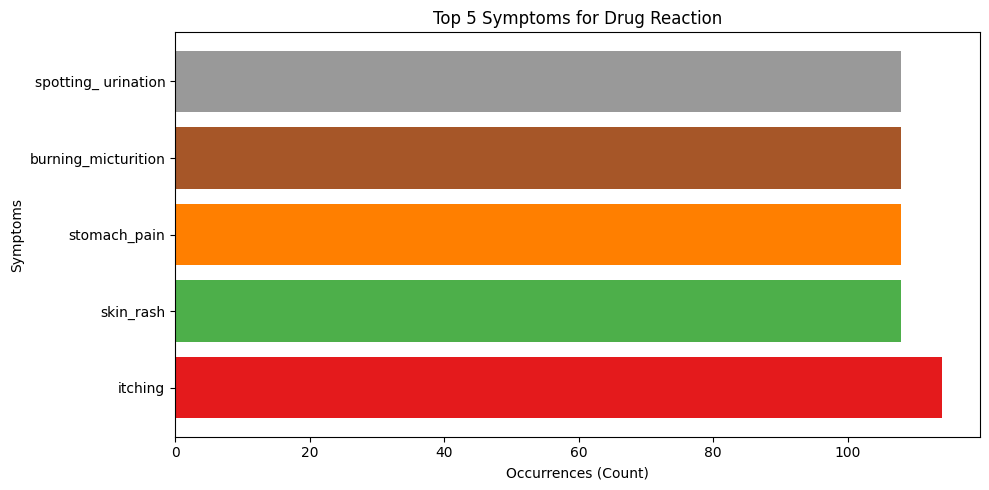

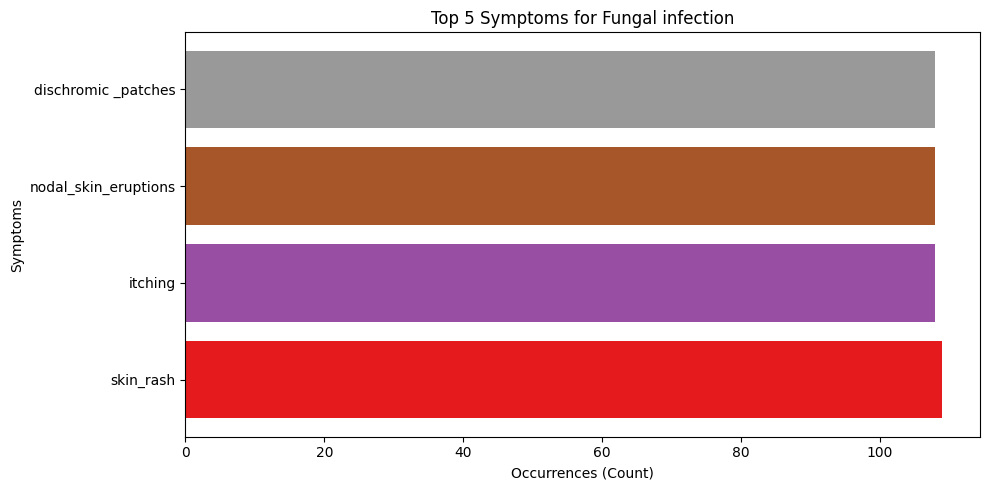

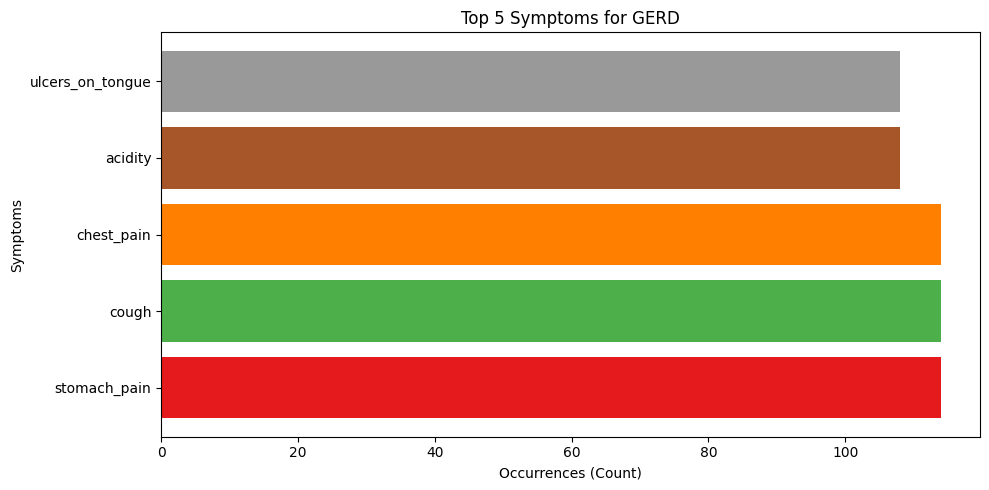

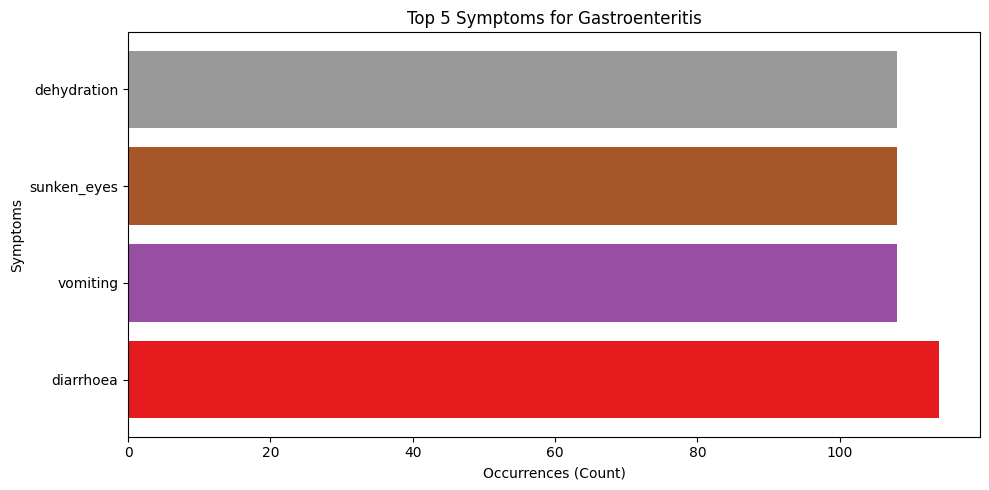

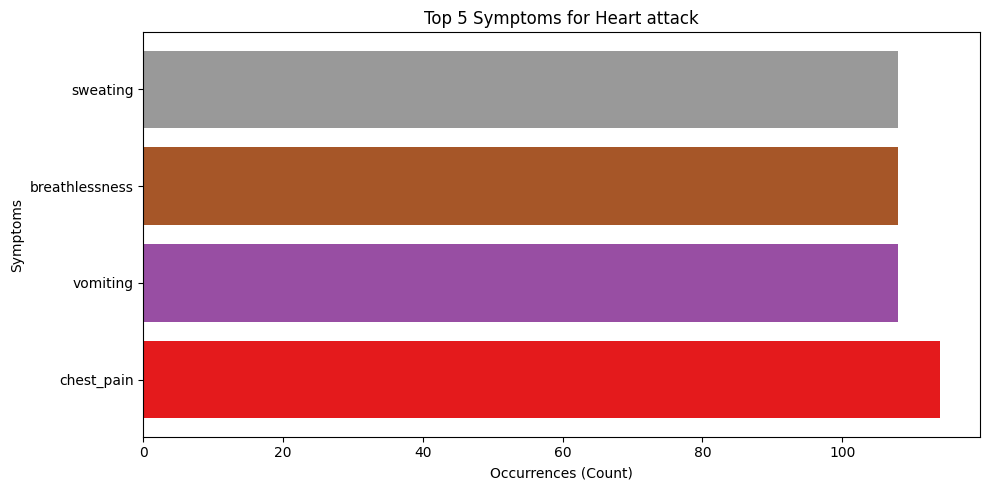

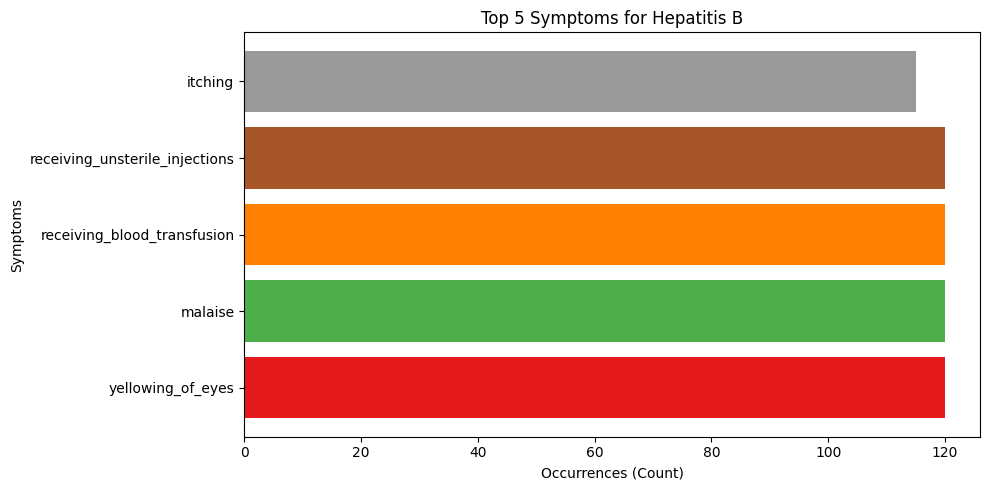

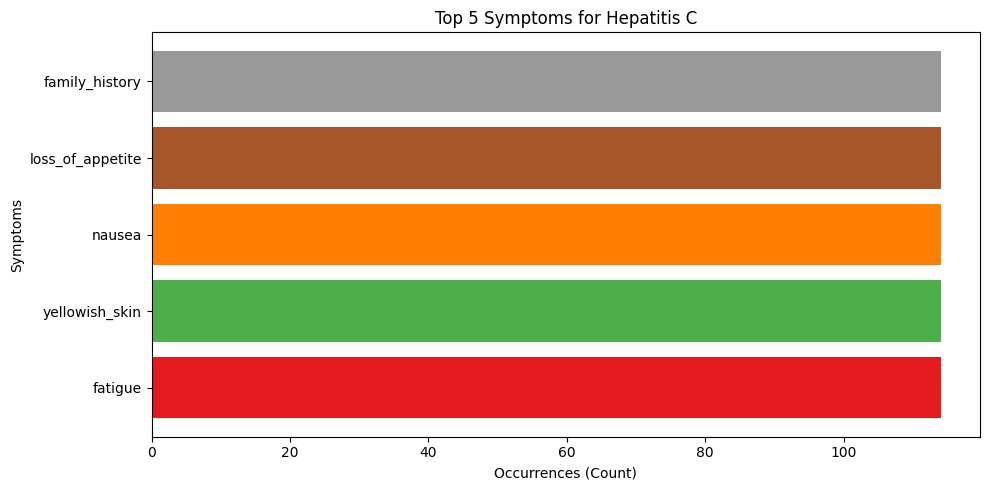

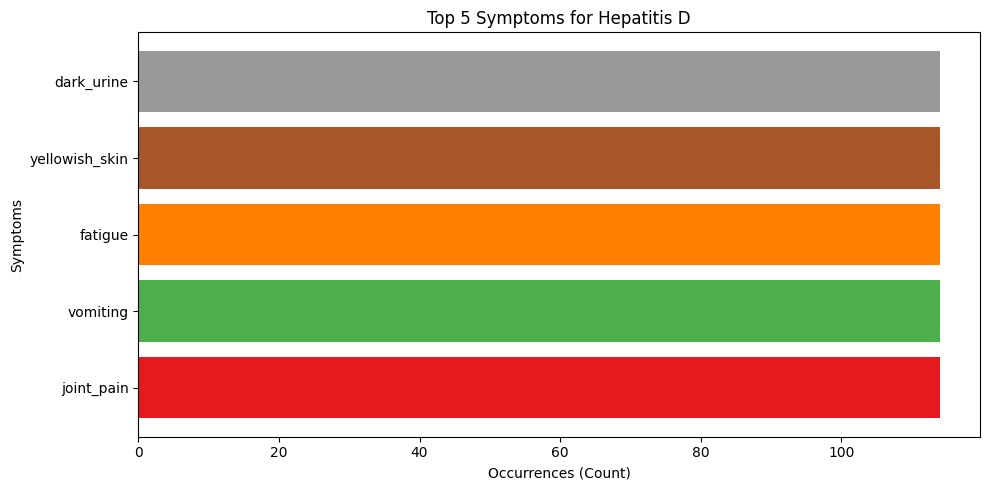

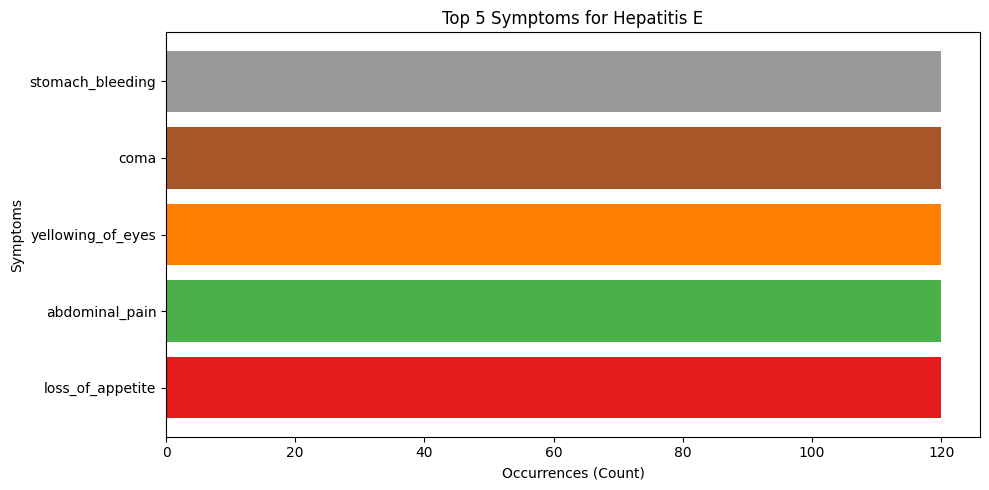

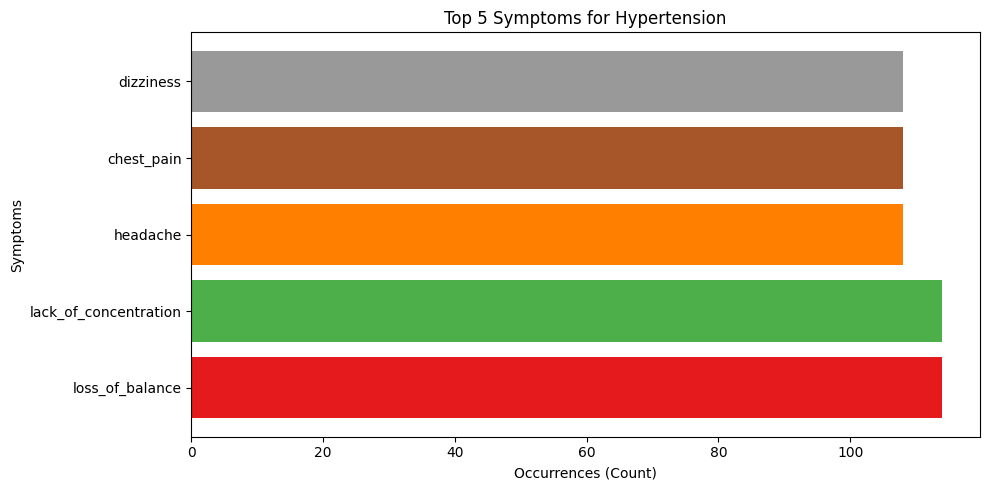

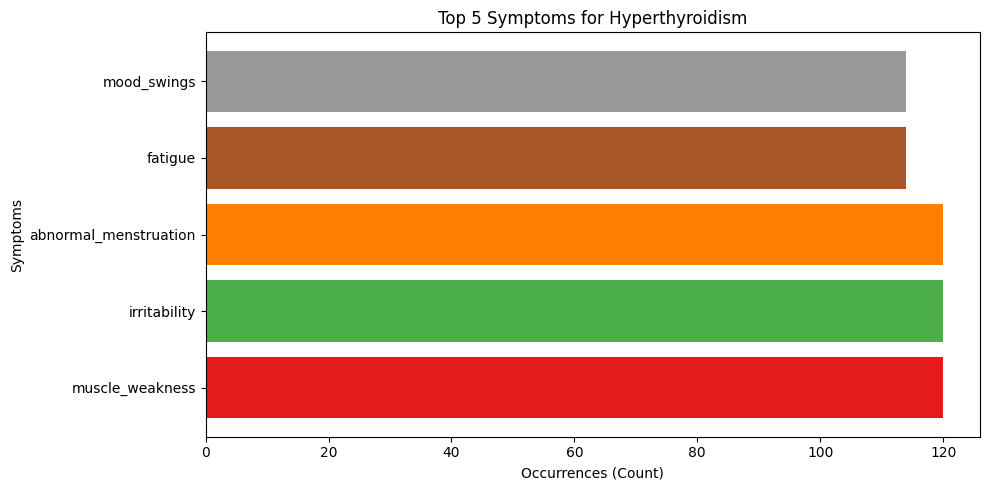

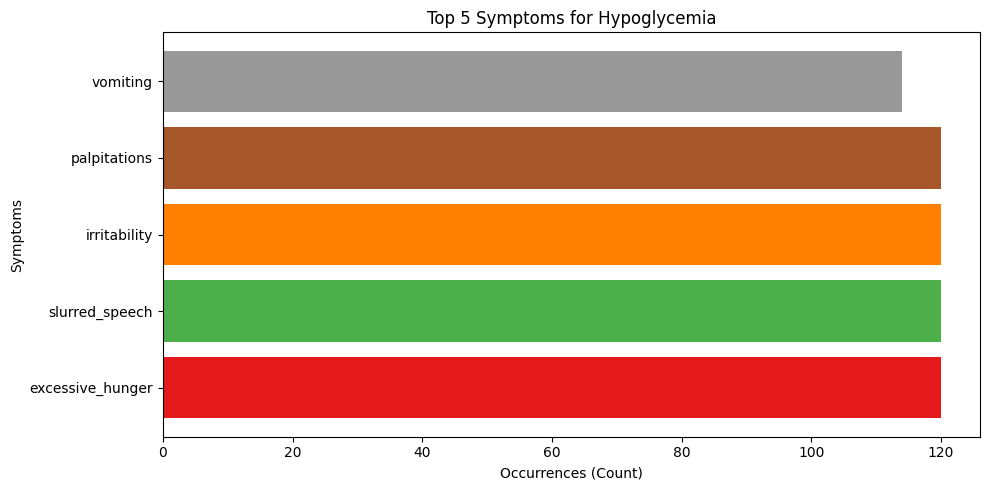

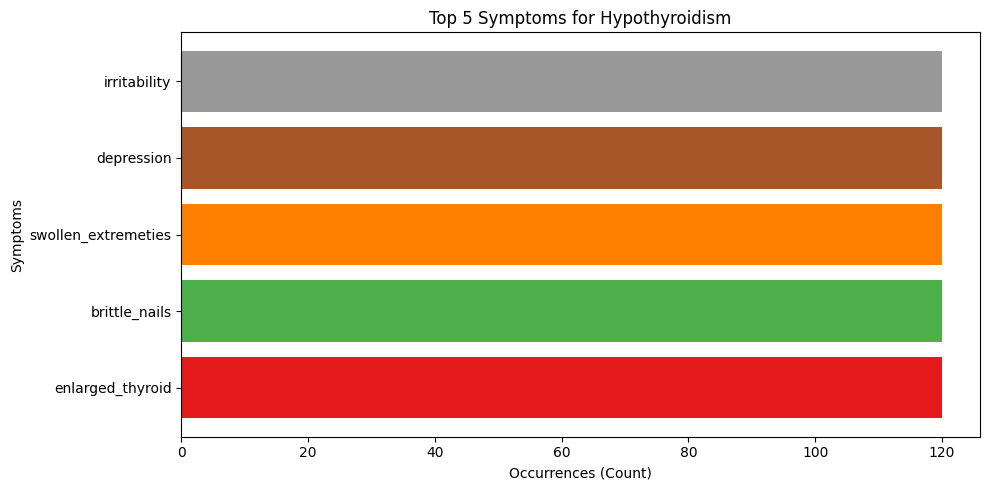

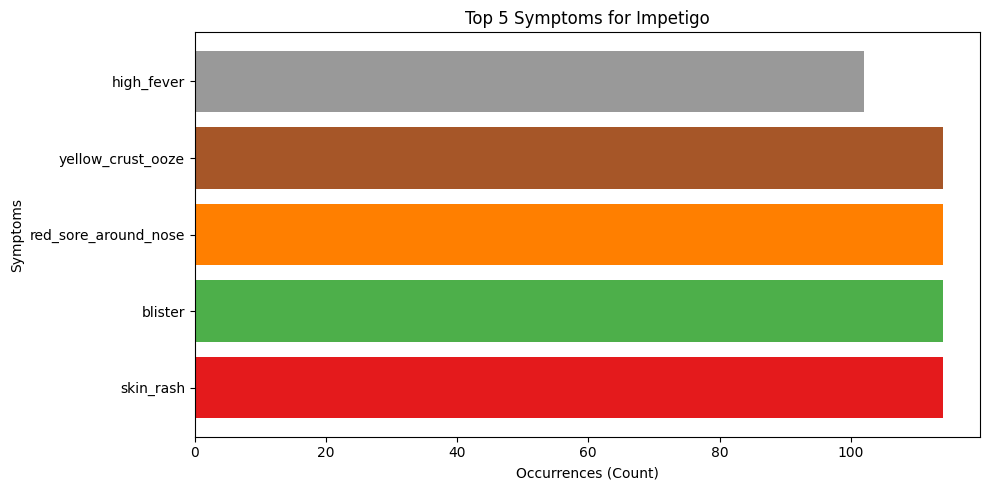

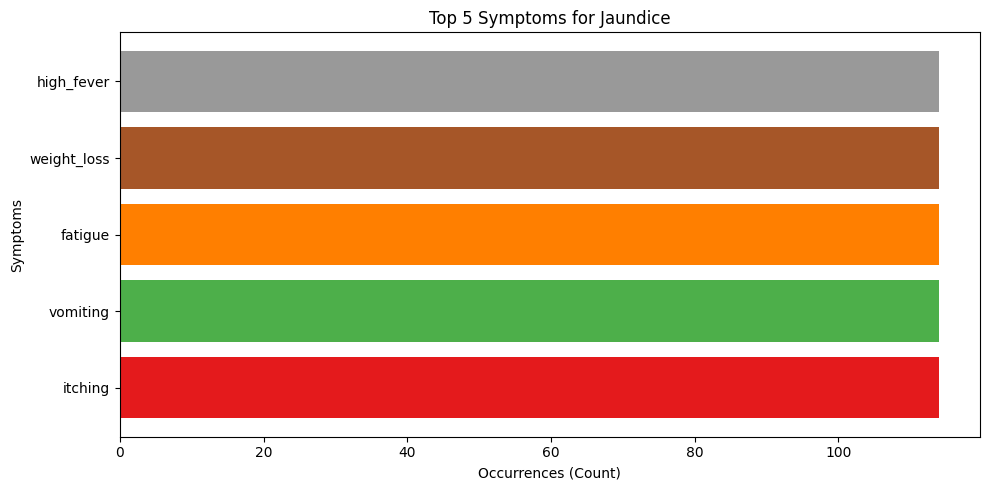

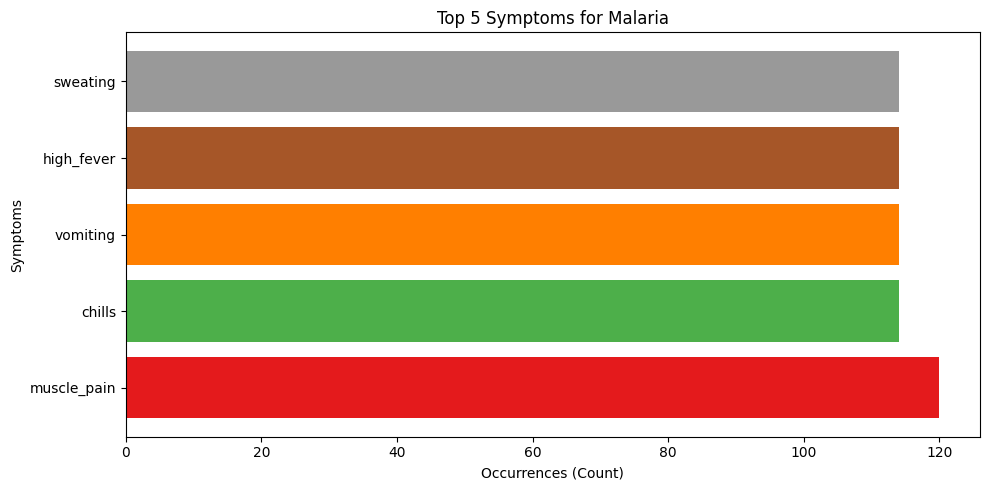

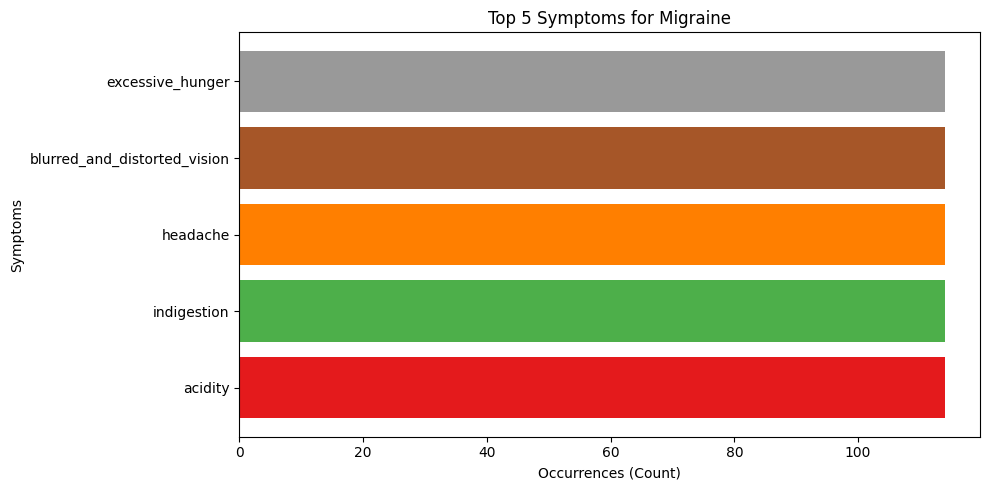

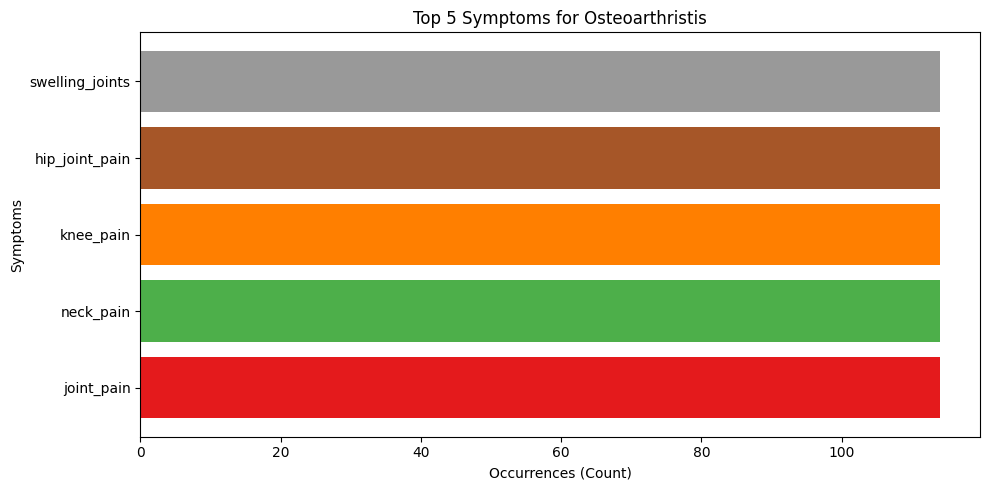

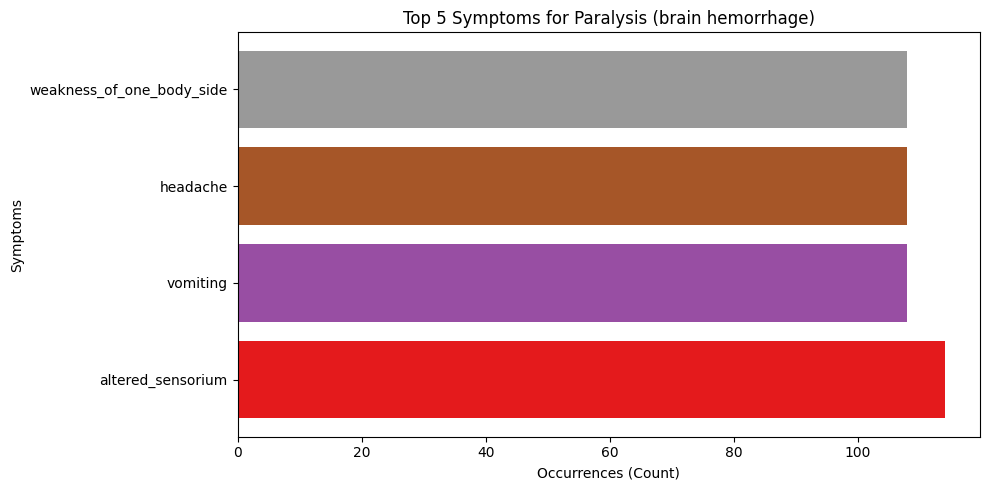

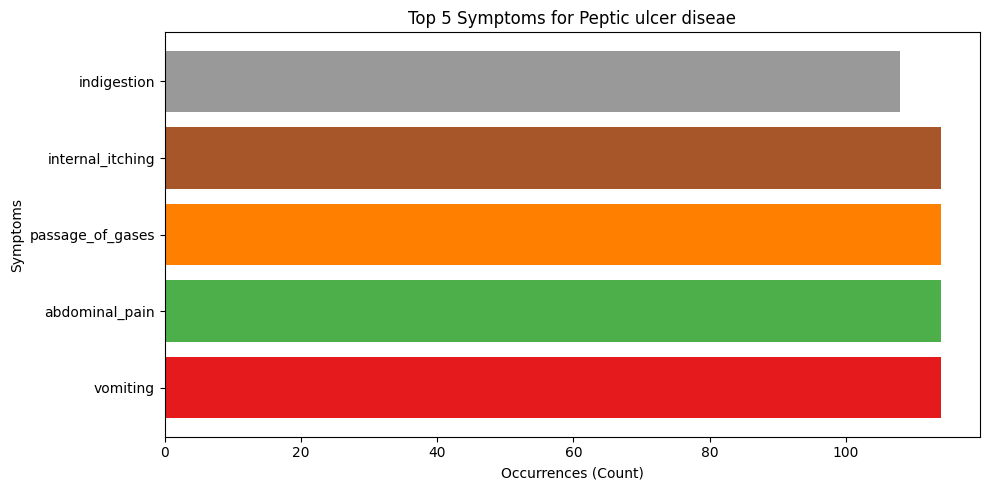

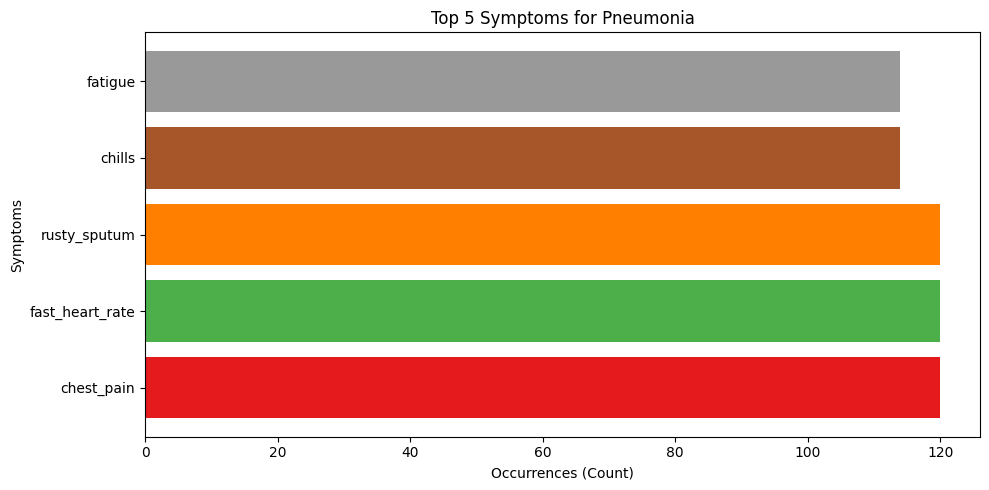

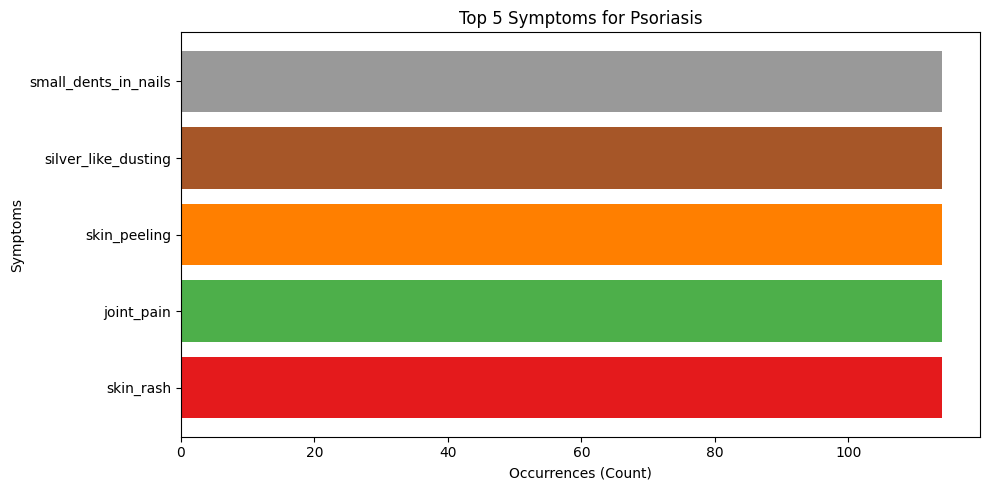

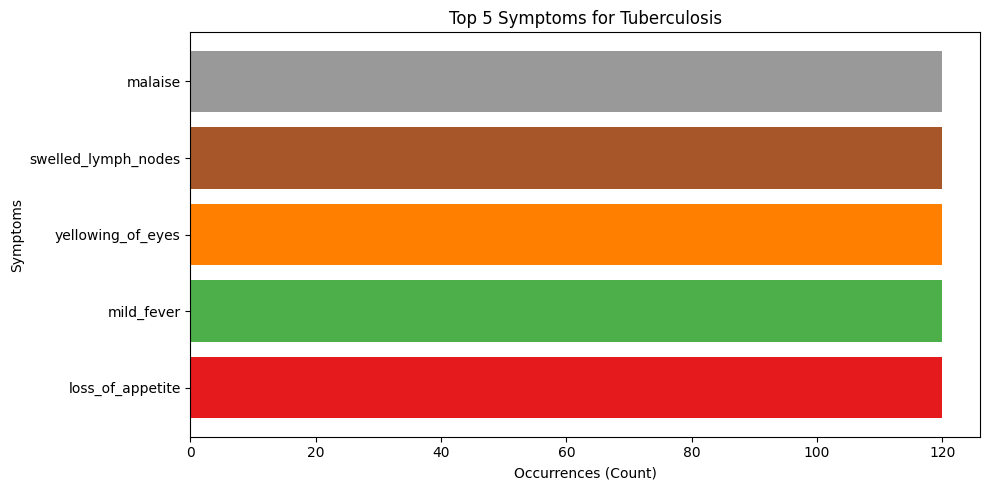

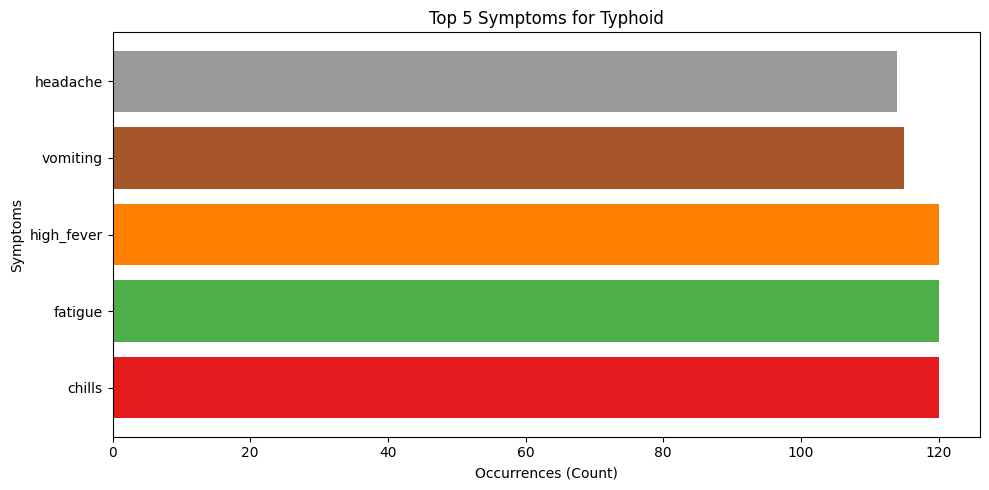

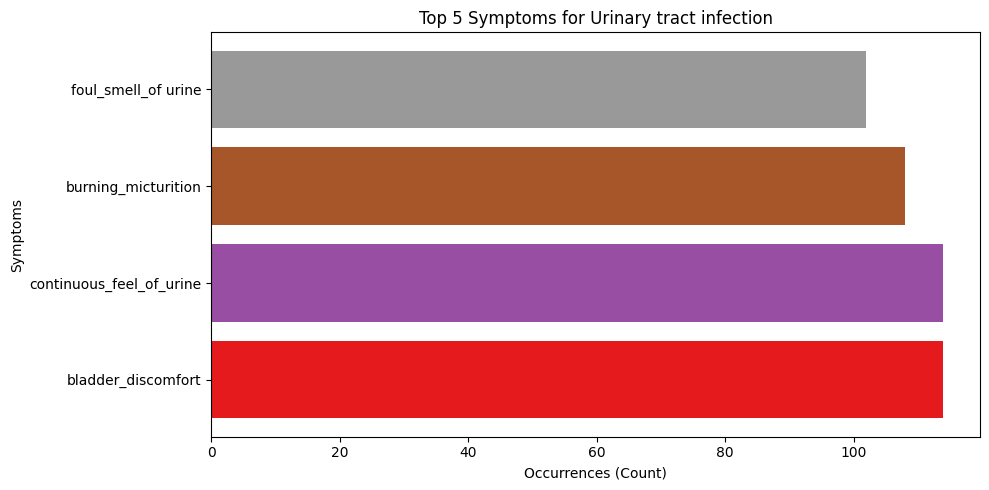

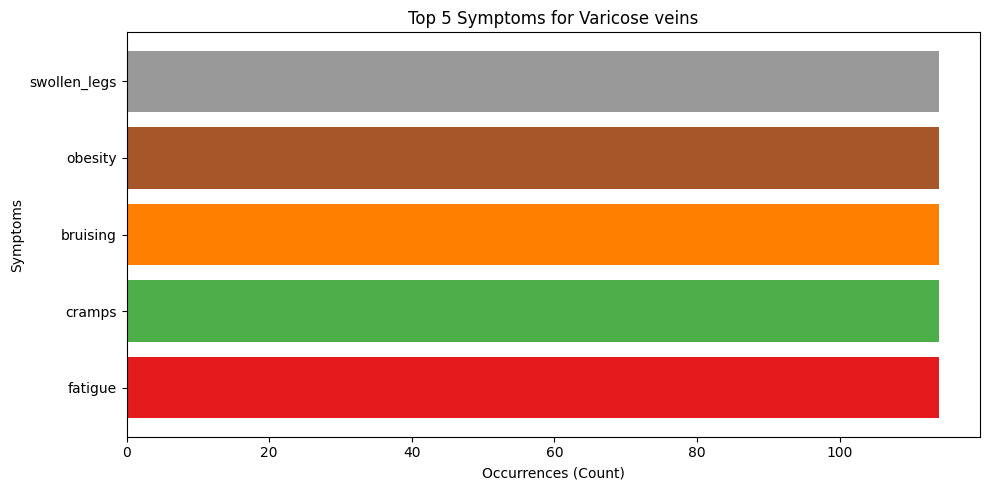

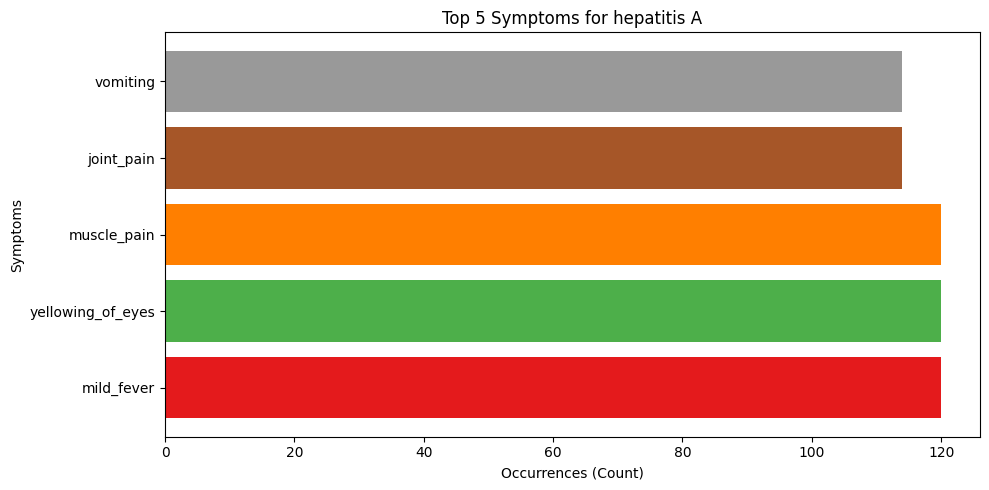

In [112]:
symptom_columns = df_train_filled.columns[1:]
unique_prognosis = df_train_filled['prognosis'].unique()

for prognosis in unique_prognosis:
    prognosis_data = df_train_filled[df_train_filled['prognosis'] == prognosis]
    prognosis_symptoms = symptom_columns[(prognosis_data.iloc[:, 1:] == 1).any()]
    symptom_occurrences = prognosis_data[prognosis_symptoms].sum()
    top_symptoms = symptom_occurrences.nlargest(5)
    num_symptoms = len(top_symptoms)
    colors = plt.cm.Set1(np.linspace(0, 1, num_symptoms))
    plt.figure(figsize=(10, 5))
    plt.barh(top_symptoms.index, top_symptoms.values, color=colors)
    plt.xlabel('Occurrences (Count)')
    plt.ylabel('Symptoms')
    plt.title(f'Top 5 Symptoms for {prognosis}')
    plt.tight_layout()

Loading testing dataset

In [82]:
uploaded = files.upload()
filename = next(iter(uploaded))
df_test = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving Testing1 - Testing.csv to Testing1 - Testing.csv


In [83]:
df_test.head()

prognosis  itching  skin_rash  nodal_skin_eruptions  \
0     Fungal infection        1          1                     1   
1              Allergy        0          0                     0   
2                 GERD        0          0                     0   
3  Chronic cholestasis        1          0                     0   
4        Drug Reaction        1          1                     0   

   continuous_sneezing  shivering  chills  joint_pain  stomach_pain  acidity  \
0                    0          0       0           0             0        0   
1                    1          1       1           0             0        0   
2                    0          0       0           0             1        1   
3                    0          0       0           0             0        0   
4                    0          0       0           0             1        0   

   ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
0  ...                   0           0         0             0   
1  ...                   0           0         0             0   
2  ...                   0           0         0             0   
3  ...                   0           0         0             0   
4  ...                   0           0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   
3                    0                     0                   0        0   
4                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  

[5 rows x 133 columns]

In [84]:
df_test.drop(columns=['fluid_overload'], inplace = True)

In [85]:
df_test.shape

(528, 132)

In [120]:
df_test.isnull().sum()

prognosis               0
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 132, dtype: int64

In [86]:
df_test.dtypes

prognosis               object
itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
                         ...  
small_dents_in_nails     int64
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
Length: 132, dtype: object

In [87]:
column_list_train = list(df_train_filled.columns)
column_list_test = list(df_test.columns)

In [88]:
if column_list_train == column_list_test:
  print("Columns are same")
else:
  print("Columns are not same")

Columns are same


Spliting dataset

In [89]:
X_train = df_train_filled.drop(["prognosis"], axis = 1)
y_train = df_train_filled["prognosis"]
X_test = df_test.drop(["prognosis"], axis = 1)
y_test = df_test["prognosis"]

**Psuedo code for models**

**Gaussian Naive Bayes**:

Calculate the prior probability for each class.
For each feature, calculate the mean and standard deviation for each class.
For a given instance:
Calculate the probability of the instance belonging to each class using the Gaussian probability density function.
Multiply the probabilities for all features and the prior probability for each class.
Choose the class with the highest probability.

**Random Forest**:

Create a forest of decision trees.
For each tree:
Randomly select a subset of features.
Build a decision tree using the selected features and the training data.
To make a prediction for a new instance:
Get predictions from each tree in the forest.
Combine the predictions (e.g., using majority voting or averaging).

**K-Nearest Neighbors (KNN)**:

Choose a value for k (the number of neighbors).
For a new instance:
Calculate the distance between the new instance and all training instances.
Find the k nearest neighbors to the new instance.
Assign the class label of the majority of the k nearest neighbors to the new instance

Model pipelines

In [90]:
# 1. Naive Bayes Pipeline
pipeline_nb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('nb', GaussianNB())
])

# 2. KNN Pipeline
pipeline_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [1, 3, 5, 7, 9],
    'knn__metric': ['euclidean', 'manhattan']
}
# 3. Random Forest Pipeline
pipeline_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}

GridSearchCV and fit for each model



In [91]:
# 1. Fitting NB
pipeline_nb.fit(X_train, y_train)

# 2. Grid search for KNN
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=4, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_model_knn = grid_search_knn.best_estimator_

# 3. Grid search for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=4, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_

predicting using each model

In [92]:
# Naive Bayes
y_pred_nb = pipeline_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
# KNN
y_pred_knn = best_model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
# Random Forest
y_pred_rf = best_model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Naive Bayes Accuracy: 0.8958333333333334
KNN Accuracy: 0.8977272727272727
Random Forest Accuracy: 0.8200757575757576


Comparing models

In [93]:
def compute_metrics(y_test, y_pred, model_name):
    print(f"\nMETRICES FOR {model_name}:")

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy}")

    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision}")

    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall: {recall}")

    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-Score: {f1}")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

In [94]:
# 1. For Naive Bayes
#y_pred_nb = pipeline_nb.predict(X_test)
compute_metrics(y_test, y_pred_nb, "Naive Bayes")

# 2. For KNN
#y_pred_knn = best_model_knn.predict(X_test)
compute_metrics(y_test, y_pred_knn, "KNN")

# 3. For Random Forest
#y_pred_rf = best_model_rf.predict(X_test)
compute_metrics(y_test, y_pred_rf, "Random Forest")


METRICES FOR Naive Bayes:

Accuracy: 0.8958333333333334
Precision: 0.9512608603517695
Recall: 0.8958333333333334
F1-Score: 0.8825203082742207
Confusion Matrix:
[[10  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 13]]

METRICES FOR KNN:

Accuracy: 0.8977272727272727
Precision: 0.9393300364222823
Recall: 0.8977272727272727
F1-Score: 0.8939611273353083
Confusion Matrix:
[[10  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 13]]

METRICES FOR Random Forest:

Accuracy: 0.8200757575757576
Precision: 0.8609782877797584
Recall: 0.8200757575757576
F1-Score: 0.7997538849488128
Confusion Matrix:
[[10  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 13]]


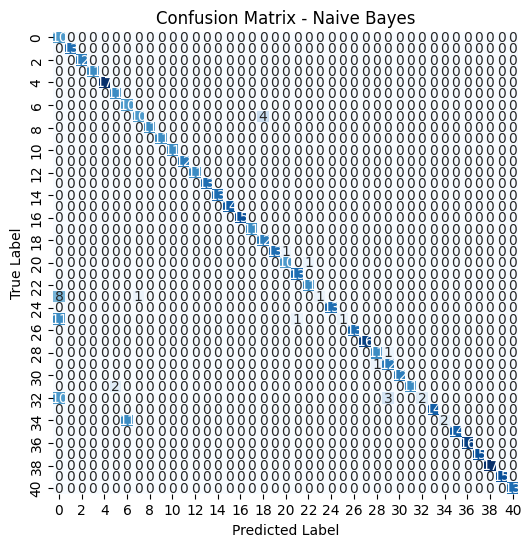

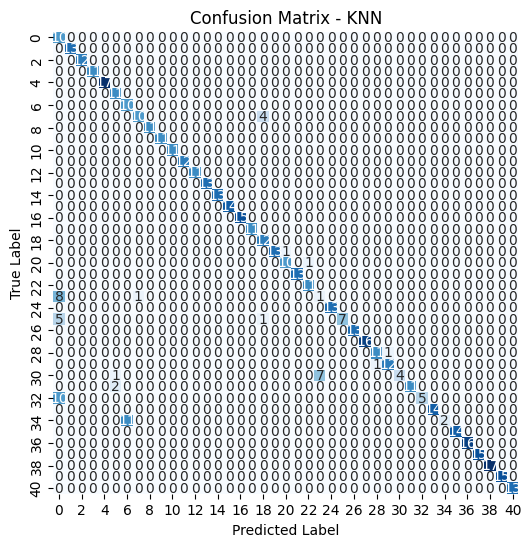

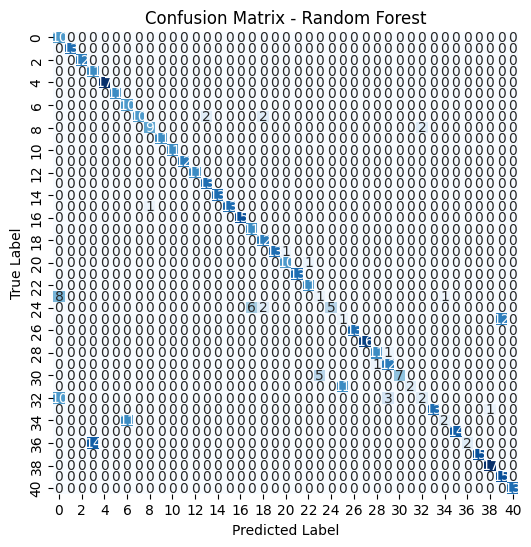

In [100]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Plot Confusion Matrices for each model
plot_confusion_matrix(confusion_matrix(y_test, y_pred_nb), "Naive Bayes")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), "KNN")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Random Forest")

Voting Classifier

In [101]:
# Create a Voting Classifier with soft voting

knn_clf = best_model_knn
nb_clf = pipeline_nb.named_steps['nb']
rf_clf = best_model_rf

voting_clf_soft = VotingClassifier(estimators=[
    ('knn', knn_clf),
    ('nb', nb_clf),
    ('rf', rf_clf)
], voting='soft')

voting_clf_soft.fit(X_train, y_train)

y_pred_voting_soft = voting_clf_soft.predict(X_test)

accuracy_voting_soft = accuracy_score(y_test, y_pred_voting_soft)
precision_voting_soft = precision_score(y_test, y_pred_voting_soft, average='weighted')
recall_voting_soft = recall_score(y_test, y_pred_voting_soft, average='weighted')
f1_voting_soft = f1_score(y_test, y_pred_voting_soft, average='weighted')
cm_voting_soft = confusion_matrix(y_test, y_pred_voting_soft)

print("Voting Classifier (Soft Voting) Results:")
print(f"Accuracy: {accuracy_voting_soft}")
print(f"Precision: {precision_voting_soft}")
print(f"Recall: {recall_voting_soft}")
print(f"F1-Score: {f1_voting_soft}")
print("Confusion Matrix:")
print(cm_voting_soft)

Voting Classifier (Soft Voting) Results:
Accuracy: 0.8996212121212122
Precision: 0.9377482848405309
Recall: 0.8996212121212122
F1-Score: 0.8920929228086353
Confusion Matrix:
[[10  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 13]]


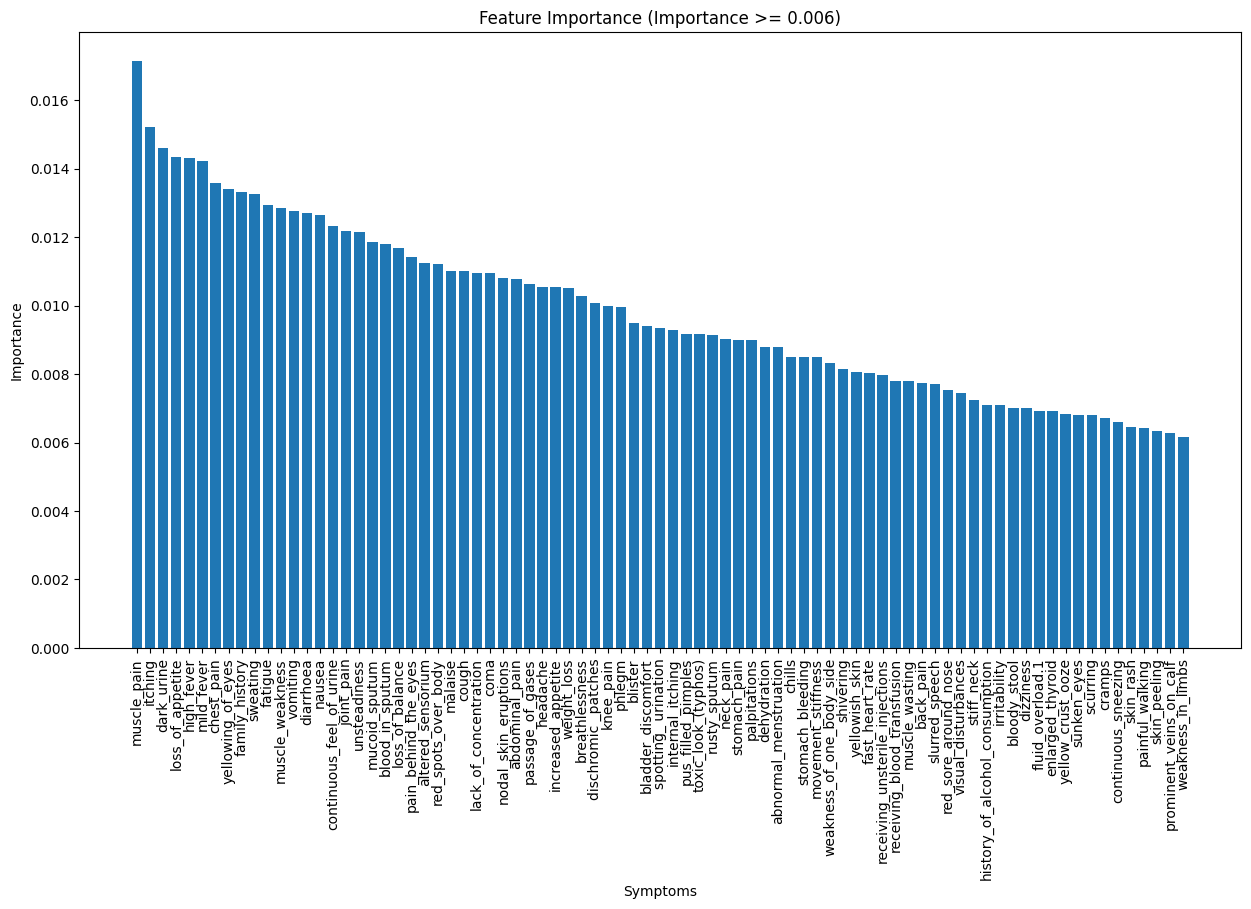

In [117]:
importances = best_model_rf.named_steps['rf'].feature_importances_
indices = np.argsort(importances)[::-1]
threshold = 0.006
important_indices = indices[importances[indices] >= threshold]
important_importances = importances[important_indices]

plt.figure(figsize=(15, 8))
plt.title("Feature Importance (Importance >= 0.006)")
plt.bar(range(len(important_importances)), important_importances, align='center')
plt.xticks(range(len(important_importances)), X.columns[important_indices], rotation=90)
plt.xlabel('Symptoms')
plt.ylabel('Importance')
plt.show()

Voting Classifier performs the best